# TP2 : Convolution, filtrage et détection de contours

Dans le domaine du traitement d'images et d'intelligence artificielle appliquées aux images, la notion de **convolution** joue un rôle fondamental. Comme vu à l'amphi, les matrices de convolution peuvent servir à réduire le bruit et à détecter les contours horizontaux et verticaux d'une image. D'ailleurs, parmi les algorithmes de classification d'images et de détection d'objets les plus performants, on peut citer les **Réseaux de Neurones Convolutifs**, ou _Convolution Neural Networks_ (CNNs) en anglais, qui sont composés d'un enchaînement de convolutions permettant d'extraire des caractéristiques des images d'entrée.

Dans ce TP, nous allons étudier les notions suivantes :
* convolution
* filtrage spatial linéaire (filtre moyenneur, filtre gaussien)
* filtrage non-linéaire (filtre médian)
* détection de contours (opérateurs de _Roberts_, _Prewitt_, _Sobel_, ...)
* mise en œuvre avec Python

## Import des modules de base

Exécutez la cellule suivante afin d'importer les modules **Numpy**, **Matplotlib** et **OpenCV**. Cette cellule doit être exécutée à chaque fois que vous réinitialisez le _kernel_.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

## 1 Convolution et filtrage spatial linéaire

### 1.1 Convolution 2D

La méthode ```filter2D``` d'**OpenCV** renvoie la convolution d'une matrice (image) par une matrice de convolution (aussi apelée *kernel* ou *masque*) comme vu en cours. Voici sa syntaxe :

``resultat = cv.filter2D(src=f, ddepth=-1 kernel=g)``

```src``` : on remplace ```f``` par la matrice de l'image originale (sur laquelle nous allons appliquer la convolution).

```ddepth=-1``` : profondeur de l'image de sortie (-1 donnera la même profondeur que l'image d'entrée).  

```kernel``` : on remplace ```g``` par la matrice de convolution.

**1.1.1** Testez la méthode ```filter2D``` sur les matrices ci-dessous.

\begin{equation}
f =
\begin{bmatrix}
5 & 5 & 6 & 1\\
5 & 5 & 7 & 0\\
2 & 4 & 8 & 0\\
1 & 1 & 1 & 1\\
\end{bmatrix}
\hspace{1.0cm}g = 
\begin{bmatrix}
0 & 1 & 0\\
1 & 1 & 1\\
0 & 1 & 0\\
\end{bmatrix}
\end{equation}

In [3]:
f = np.array([[5,5,6,1],[5,5,7,0],[2,4,8,0],[1,1,1,1]], np.float32)
g = np.array([[0,1,0],[1,1,1],[0,1,0]], np.float32)

resultat = cv.filter2D(src=f, ddepth=-1, kernel=g)
print(resultat)


[[25. 26. 26. 13.]
 [22. 26. 26. 15.]
 [16. 20. 20. 17.]
 [ 7. 11. 19.  3.]]


**1.1.2** Comparez votre résultat avec celui montré sur le slide 20 du cours (*Convolution et filtres*). Remarquez que ```cv.filter2D``` renvoie un résultat de même taille que l'image originale grâce au *padding* déjà intégré dans l'implémentation de cette méthode. En analysant le résultat précédent, quel type de *padding* est utilisé par défaut (zéros ou reflet) ?

### 1.2 Filtrage/lissage moyenneur

**1.2.1** La matrice $I$ ci-dessous représente une image à niveaux de gris de taille 10 × 10 pixels. Exécutez le code suivant afin de visualiser $I$ en niveaux de gris.

\begin{bmatrix}
96 & 80 & 64 & 48 & 32 & 32 & 48 & 64 & 80 & 96\\
80 & 64 & 48 & 32 & 16 & 16 & 32 & 48 & 64 & 80\\
64 & 48 & 32 & 16 & 224 & 224 & 16 & 32 & 48 & 64\\
48 & 32 & 16 & 224 & 192 & 192 & 224 & 16 & 32 & 48\\
32 & 16 & 224 & 192 & 128 & 128 & 192 & 224 & 16 & 32\\ 
32 & 16 & 224 & 192 & 128 & 128 & 192 & 224 & 16 & 32\\ 
48 & 32 & 16 & 224 & 192 & 192 & 224 & 16 & 32 & 48\\
64 & 48 & 32 & 16 & 224 & 224 & 16 & 32 & 48 & 64\\
80 & 64 & 48 & 32 & 16 & 16 & 32 & 48 & 64 & 80\\
96 & 80 & 64 & 48 & 32 & 32 & 48 & 64 & 80 & 96\\
\end{bmatrix}

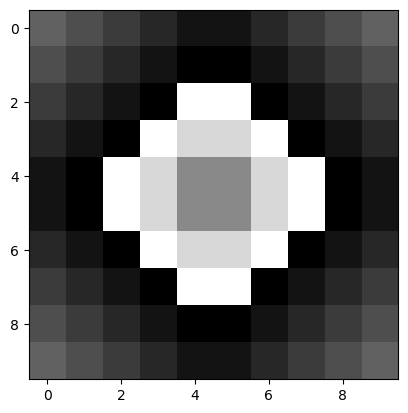

In [4]:
I = np.array([[96 , 80 , 64 , 48 , 32 , 32 , 48 , 64 , 80 , 96],
     [80 , 64 , 48 , 32 , 16 , 16 , 32 , 48 , 64 , 80],
     [64 , 48 , 32 , 16 , 224 , 224 , 16 , 32 , 48 , 64],
     [48 , 32 , 16 , 224 , 192 , 192 , 224 , 16 , 32 , 48],
     [32 , 16 , 224 , 192 , 128 , 128 , 192 , 224 , 16 , 32],
     [32 , 16 , 224 , 192 , 128 , 128 , 192 , 224 , 16 , 32],
     [48 , 32 , 16 , 224 , 192 , 192 , 224 , 16 , 32 , 48],
     [64 , 48 , 32 , 16 , 224 , 224 , 16 , 32 , 48 , 64],
     [80 , 64 , 48 , 32 , 16 , 16 , 32 , 48 , 64 , 80],
     [96 , 80 , 64 , 48 , 32 , 32 , 48 , 64 , 80 , 96]], np.float32)

plt.imshow(I, cmap='gray')

**1.2.2** Etant donne le kernel ```K``` d'un filtre moyenneur de dimension $3 \times 3$ (slide 29 du cours *Convolution et filtres*), calculez à la main la valeur du premier pixel (celui le plus en haut à gauche) du résultat de la convolution de ```I``` par ```K``` en utilisant un *padding* reflet.

**1.2.3** Vérifiez votre calcul à l'aide de la fonction ```cv.filter2D``` et visualizez le résultat sous forme d'une image en niveaux de gris.

**1.2.4** Effectuez la convolution de ```I``` par des filtres moyenneurs de dimension $5 \times 5$ et $7 \times 7$ et visualisez les résultats.

In [22]:
# À compléter...

**1.2.5** Appliquez un filtre moyenneur sur l'image réelle ci-dessous _canvas_gris.png_. Comparez les résultats obtenus avec de matrices de convolution de différentes tailles ($3 \times 3$, $5 \times 5$, $7 \times 7$...).

![Image](canvas_gris.png)

In [20]:
# À compléter...

**1.2.6** Comparez également vos résultats avec ceux obtenus en utilisant directement la fonction de filtrage moyenneur d’**OpenCV** : 

```resultat = cv.blur(img,(n,n),borderType=cv.BORDER_CONSTANT)```

Cette fonction aplique un filtre moyenneur sur l'image ```img``` avec un kernel de dimension $n \times n$. La valeur de ```borderType``` sert à paramétriser le type de *padding* :

```cv.BORDER_CONSTANT``` : zéros (valeur par défaut)

```cv.BORDER_REFLECT_101``` : reflet

D'autres valeurs possibles sont listées [ici](https://docs.opencv.org/4.1.1/d2/de8/group__core__array.html#ga209f2f4869e304c82d07739337eae7c5). 

In [21]:
# À compléter...

### 1.3 Filtrage/lissage gaussien :

**1.3.1** Effectuez un filtrage gaussien sur l’image _canvas_gris.png_ en utilisant la fonction ```cv.filter2D``` et le kernel gaussien suivant :

\begin{equation}
k=\frac{1}{16}
\begin{bmatrix}
1 & 2 & 1 \\
2 & 4 & 2\\
1 & 2 & 1\\
\end{bmatrix}
\end{equation}

In [19]:
# À compléter...

----

En réalité, le *kernel* ```k``` ci-dessus est une discrétisation et une approximation d'une fonction Gaussienne en 2D avec un écart type $\sigma=0.85$. 

Plus l'écart type est petit, plus le sommet de la courbe sera haut. De façon similaire, plus l'écart type est élevé, plus la courbe sera plate.

Dans le cas discret, cela veut dire que, plus l'écart type est petit, plus la valeur au milieu du *kernel* sera élevée et plus les valeurs dans le bord seront petites. De la même manière, plus l'écart type est élevé, plus le kernel sera "plat" et s'approchera du *kernel* du filtre moyenneur.

Par exemple, pour un écart type de $0.5$ et de $2$, les *kernels* Gaussian de dimension $3 \times 3$ auront environ les valeurs suivantes :

\begin{equation}
k_{0.5} =
\begin{bmatrix}
0.01 & 0.08 & 0.01 \\
0.08 & 0.62 & 0.08 \\
0.01 & 0.08 & 0.01 \\
\end{bmatrix}
\hspace{1.0cm}k_{2} = 
\begin{bmatrix}
0.10 & 0.12 & 0.10\\
0.12 & 0.13 & 0.12\\
0.10 & 0.12 & 0.10\\
\end{bmatrix}
\end{equation}



<p align="center">
  <img alt="img-name" src="gauss.png" width="300">
  <br>
    <em>Gaussienne avec un écart-type plus petit à gauche et plus elevé à droite.</em>
</p>

**NB** : La fonction _cv.getGaussianKernel_ permet de calculer des *kernels* gaussiens. Par exemple, pour créer un *kernel* de taille $3 \times 3$ et d'écart-type $0.85$ :

```k_aux = cv.getGaussianKernel(3,0.85)```

```k = np.matmul(k_aux, np.transpose(k_aux))```

-----

**1.3.2** Quel est l'impact de l'écart-type de la gaussienne dans le résultat du filtrage ? Appliquez des filtres gaussiens sur l'image ```canvas_gris.png``` avec un *kernel* de taille $7 \times 7$ en variant les valeurs des écarts-types (testez au moins $0.5$, $1.0$ et $2.0$).

Pour cela, vous pouvez :

1. Soit créer un kernel ```k``` en utilisant les méthodes ```cv.getGaussianKernel``` et ```np.matmul```, comme illustré ci-dessus, et ensuite apliquer la méthode ```cv.filter2D```
2. Soit utiliser la méthode ```cv.GaussianBlur``` directement. Par exemple :

```resultat = cv.GaussianBlur(img, (3, 3), 0.8, borderType=cv.BORDER_CONSTANT)``` applique un filtre avec un kernel gaussien de taille $3 \times 3$ et d’écart-type $0.8$.

In [1]:
# À compléter...

## 2 Filtre d’ordre

Parmi les filtres d’ordre (filtre non-linéaire), il en existe trois basiques :
* le filtre _min_ qui renvoie la valeur minimum parmi les 9 pixels du voisinage (si on considère une fenêtre $3 \times 3$),
* le filtre _max_ qui renvoie la valeur maximum parmi les 9 pixels du voisinage (dans le cas d’une fenêtre $3 \times 3$),
* et le filtre _médian_ qui renvoie la valeur médiane parmi les 9 pixels du voisinage (dans le cas d’une fenêtre $3 \times 3$).

Le filtre _min_ noircit l’image puisqu’il privilégie des valeurs faibles tandis que le filtre _max_ éclaircit l’image. De plus, les filtres d’ordre ont tendance à uniformiser des petites régions. Les filtres _min_ et _max_ étant “peu intéressants”, étudions le cas du filtre _médian_.

**2.1** La fonction d’OpenCV ```cv.medianBlur(img, tailleVoisinage)``` aplique un filtre médian à l'image ```img``` (où _tailleVoisinage_ est un entier, par exemple 3 si on souhaite un voisinage $3 \times 3$). Ouvrez et visualisez l'image _bateaux_nb_bruite.bmp_. Ensuite, appliquez un filtre médian sur cette image pour en supprimer le bruit.

In [12]:
bateaux = cv.imread("bateaux_nb_bruite.bmp",0)

# À compléter...

**2.4** Testez aussi le filtre moyenneur sur l'image bruitée. Quel de deux filtres (médian ou moyenneur) vous semble plus adapté à ce type de bruit ?

In [17]:
# À compléter...

## 3 Détection de contours

Comme vu en cours, les matrices de convolution s'avèrent utiles dans le floutage/réduction de bruits d'une image d'entrée (_e.g._ filtres Gaussien et Moyenneur), ainsi que dans la détection de contours. Dans tous les cas, l'algorithme de convolution reste même, ce qui change est seulement la matrice de convolution (ou _kernel_).

En utilisant les opérateurs de _Roberts_, _Prewitt_ et _Sobel_, le principe est le suivant :

1. Calcul du gradient en X de l'image par convolution : $G_x = I \star h_x$ 
2. Calcul du gradient en Y de l'image par convolution : $G_y = I \star h_y$
3. Calcul du module du gradient (c.-à-d. la combinaison des contours verticaux et horizontaux) : ```moduleGradient``` = $\sqrt{G_x^2 + G_y^2}$

Pour chacun de ces trois opérateurs, les matrices de convolution $h_x$ et $h_y$ sont définies comme :

**Roberts3**

\begin{equation}
h_x =
\begin{bmatrix}
0 & 0 & 0\\
-1 & 0 & 1\\
0 & 0 & 0\\
\end{bmatrix}
\hspace{1.0cm}h_y = 
\begin{bmatrix}
0 & -1 & 0\\
0 & 0 & 0\\
0 & 1 & 0\\
\end{bmatrix}
\end{equation}

**Prewitt**

\begin{equation}
h_x =
\begin{bmatrix}
-1 & 0 & 1\\
-1 & 0 & 1\\
-1 & 0 & 1\\
\end{bmatrix}
\hspace{1.0cm}h_y = 
\begin{bmatrix}
-1 & -1 & -1\\
0 & 0 & 0\\
1 & 1 & 1\\
\end{bmatrix}
\end{equation}

**Sobel**

\begin{equation}
h_x =
\begin{bmatrix}
-1 & 0 & 1\\
-2 & 0 & 2\\
-1 & 0 & 1\\
\end{bmatrix}
\hspace{1.0cm}h_y = 
\begin{bmatrix}
-1 & -2 & -1\\
0 & 0 & 0\\
1 & 2 & 1\\
\end{bmatrix}
\end{equation}

**3.1** À l'aide de ```cv.filter2D```, implémentez les détecteurs de contours de _Roberts_, _Prewitt_ et _Sobel_. Faites en sorte que les matrices résultantes aient des valeurs normalisées entre ```0``` et ```255```.

**Rappel**
- Étant donné un _numpy array_ ```M```, ```M**2``` calcule le carré de chaque élément de ```M```
- La fonction ```np.sqrt(M)``` calcule la racine carrée de chaque élément de ```M```
- Pour normaliser une matrice ```M``` (valeurs entre ```0``` et ```255```) : ```(M - np.min(M))/(np.max(M)-np.min(M)) * 255``` 

In [3]:
# Dans les quatre fonctions ci-dessous, 'img' est la representation matriciele d'une image en niveau de gris
# Par exemple, étant donné une image "test.png", on l'obtient de la façon suivante :
# img = cv.imread("test.png", 0)
# La sortie 'moduleGradient' de chaque fonction est une nouvelle matrice de même dimension que 'img' contenant le résultat de la
# detection des contours de 'img'.

def roberts(img):
    moduleGradient = ...
    # A compléter...
    return moduleGradient.astype("uint8")

def prewitt(img):
    moduleGradient = ...
    # A compléter...
    return moduleGradient.astype("uint8")

def sobel(img):
    moduleGradient = ...
    # A compléter...
    return moduleGradient.astype("uint8")

**3.2** Testez ces trois fonctions sur l'image _canvas_gris.png_ ou sur une image de votre choix, et affichez le résultat à l'aide de la fonction ```plt.imshow(C, cmap='gray')```, où ```C``` doit être remplacé par la sortie de chaque fonction.

In [ ]:
# À compléter...

**3.3** Les fonctions ```roberts```, ```prewitt``` et ```sobel``` renvoient des images en niveau de gris tel que la valeur d'un pixel est proportionnelle à la probabilité qu'il appartienne à un contour. À l'aide d'un seuillage binaire, calculez et affichez des images binaires (1 pour les pixels appartenant à un contour, 0 sinon) à partir des sorties des fonctions ```roberts```, ```prewitt``` et ```sobel```.

**Rappel** : ```seuil,contours = cv.threshold(moduleGradient,seuil,255,cv.THRESH_BINARY)```.

In [16]:
# À compléter...

**3.4** Testez ces trois détecteurs de contours sur l’image _bateaux_nb_bruite.bmp_. Comment peut-on améliorer la détection de contours sur cette image ?

In [25]:
# À compléter...